# Carregar as bibliotecas

In [1]:
import numpy as np
from skimage import io, data, filters, util, color
from scipy import ndimage, stats
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_uint

In [12]:
def mapping1D(img):
    nimg = img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

In [13]:
def mappingND(img):
    dims = img.ndim
    nimg = np.zeros_like(img, dtype='float')
    for i in range(img.shape[dims-1]):
      nimg[:,:,i] = mapping1D(img[:,:,i])
    return nimg

# Questão 1

<p align="justify">
Modifique o código *NoiseSum*, disponível nos slides, que remove o ruído de $n$ imagens ruidosas através da média das $n$ as imagens. No lugar da média use a mediana. Para encontrar a mediana de um conjunto de elementos basta ordenar os dados e selecionar o elemento que se encontra no meio do conjunto de dados. Por exemplo, seja $A = [4, 6, 2, 9, 1, 3, 9]$, depois de ordenar o vetor, fica da seguinte forma $A = [1, 2, 3, 4, 6, 9, 9]$. A mediana é o elemento que se encontra no meio do conjunto, neste caso seria o número 4. Para ordenar um conjunto de elementos use a função <i>numpy.sort(dados, axis=- 1)</i>, onde <i>dados</> são os elementos que vão ser ordenados e <i>axis</i> especifica em qual das dimensões da matriz vai ser realizada a ordenação dos dados, 0 ordenada por linhas, 1 por colunas e 2 por profundidade.
</p>

<p align="justify">
Logo, modifique seu código usando a função <i>numpy.median(dados, axis)</i> para encontrar a imagem "mediana".
</p>

#####DICA: Salve as imagens ruidosas em uma matriz tridimensional para poder aplicar as funções *sort* e *median*. A variável *figs* da função *NoiseSum* é uma lista e não uma matriz


In [7]:
# função definada no slides da aula
def NoiseSum(img, n):
    nimg = np.zeros_like(img, dtype='float')
    figs = [None] * n
    for i in range(n):
        tmp = util.random_noise(img, 'gaussian')
        figs[i] = tmp
        nimg += figs[i]
    nimg /= n
    return figs, nimg

In [4]:
# usando a função sort
def NoiseSumMediana1(img, n):
    yield
    return figs, nimg

In [8]:
# usando a função median
def NoiseSumMediana2(img, n):
    yield
    return figs, nimg

(512, 512, 10)
(512, 512, 10)


Text(0.5, 1.0, 'Imagem Filtrada 2')

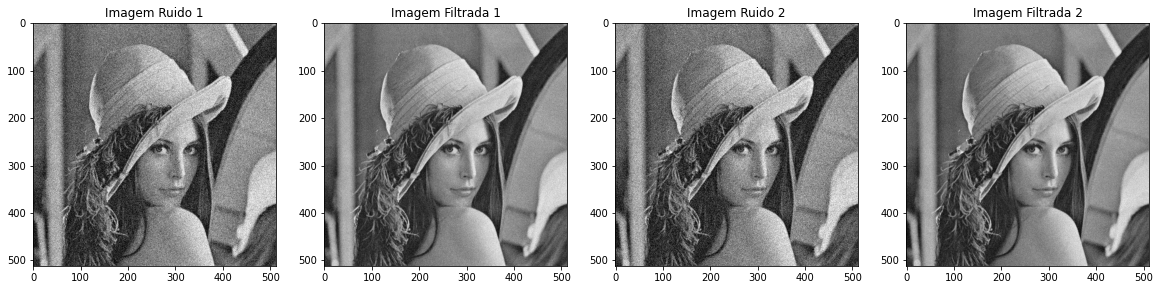

In [10]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_', as_gray=True)
figs1, nimg1 = NoiseSumMediana1(lenna, 10)
figs2, nimg2 = NoiseSumMediana2(lenna, 10)

f, ax = plt.subplots(1,4, figsize=(20,20))

ax[0].imshow(figs1[:,:,4], cmap='gray')
ax[0].set_title('Imagem Ruido 1')

ax[1].imshow(nimg1, cmap = 'gray')
ax[1].set_title('Imagem Filtrada 1')

ax[2].imshow(figs2[:,:,4], cmap='gray')
ax[2].set_title('Imagem Ruido 2')

ax[3].imshow(nimg2, cmap = 'gray')
ax[3].set_title('Imagem Filtrada 2')

# Questão 2
<p align="justify">
Mudar a cor do fundo (<i>background</i>) da imagem na escala de cinza, ela deve estar em tons de azul claro. Além da imagem em escala de cinza, é fornecida a imagem binária que é a máscara onde os fósforos estão representados pela cor branca e o fundo pela cor preta. Use operações aritméticas para executar o processo de modificação do fundo. A continuação são mostradas a imagem em escala de cinza e a sua respectiva máscara.
</p>

<table><tr>
<td> 
<figure><img src="https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo" alt="Drawing" width="300" class="center"/> 
<figcaption>Imagem em escala de cinza</figcaption>
</figure>
</td>
<td> 
<figure>
<img src="https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe" alt="Drawing" width="300" class="center"/> 
<figcaption>Máscara</figcaption>
</figure>
</td>
</tr>
</table>

<p align="justify">
DICA: para conseguir modificar a intensidade do fundo, incremente um valor $inc$ nos canais vermelho e verde, e incremente um valor $2*inc$ no canal azul. Preserve as intensidades originais dos fósforos. 
Não esqueça de converter a imagem para float, use a função <i>img_as_float</i>. Depois de realizar as operações matemáticas, probablemente os valores dos pixels fiquem fora do intervalo válido $[0,1]$. Use a função <i>Mapping</i> para normalizar os valores.
</p>

<p align="justify">
 Figura a continuação mostra o resultado final. A imagem gerada deve ser colorida e o tecido (fundo da imagem) deve aparecer na cor azul claro.
</p>

<center>
<figure>
<img src="https://drive.google.com/uc?id=1vGfZccYEdWi1wLmKXow6rqgyF2phkXSA" alt="Drawing" width="300" class="center"/> 
<figcaption>Imágem resultante</figcaption>
</figure>
</center>



In [18]:
def change_background(img, mask):
  yield
  return nimg
  

(-0.5, 599.5, 599.5, -0.5)

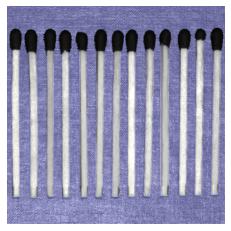

In [19]:
img = io.imread('https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo')
mask = io.imread('https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe')
nimg = change_background(img, mask)
plt.imshow(nimg)
plt.axis('off')


# Questão 3
<p align="justify">
A partir de duas imagens, gere o efeito que combina (<i>blend<i/>) duas imagens de forma tal que na imagem resultante, a parte central da primeira imagem aparece com maior intensidade e a medida que vai se afastando para as bordas vai perdendo intensidade. Um efeito inverso acontece com a segunda imagem, ela é mais intensa nas bordas da imagem, mas perde força na parte central.
</p>

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=12VqltvY0yX_nBl3XxmAWHg7u2x3LWgiu" alt="Drawing"  width="300"/> </td>
</tr></table>

<p align="justify">
DICA: O peso atribuido para a primeira imagem tem o mesmo comportamento que uma função Gaussiana 2D,a parte central tem um peso maior e a medida que se afasta o peso vai diminuindo. Já a segunda imagem tem um comportamento inverso.
</p>


<center>
<figure>
 <img src="https://drive.google.com/uc?id=1V81QWtQnCUACbeLHxCXbAJq03ZImqPO2" alt="Drawing"  width="400"/>
<figcaption>Função Gaussiana 2D</figcaption>
</figure>
</center>









In [26]:
def gaussian_mask(shape=(3,3), sigma=0.5):
    yield
    return h



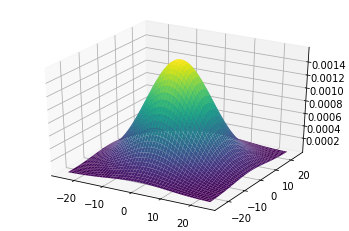

In [29]:
shape = (50,50)
lin, col = [(ss-1.)/2. for ss in shape]
h2 = gaussian_mask(shape, sigma=10)

x, y = np.ogrid[-lin:lin+1, -col:col+1]
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,h2, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

In [ ]:
def blend(img1=None, img2=None, sigma = 10):
  yield
  return nimg

512
512
(512, 512)


(-0.5, 511.5, 511.5, -0.5)

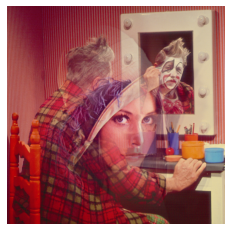

In [ ]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_', as_gray = False)
clown = io.imread('https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s', as_gray = False)
clown = color.rgba2rgb(clown)
img = blend(lenna, clown, 100)
plt.imshow(img, cmap='gray')
plt.axis('off')